
## Sentiment Analysis NLP Hotel Reviews


Importing Libraries and Dependencies 

In [ ]:
# supress warnings

import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import Data

In [ ]:
hotel_train=pd.read_csv("/content/hotel_train.csv")


In [ ]:
hotel_train.shape

(38932, 5)

In [ ]:
#38932 rows and 5 columns in the data. 

In [ ]:
hotel_train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [ ]:
hotel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [ ]:
#we can see the data types and the count of each column

In [ ]:
hotel_train.describe()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
count,38932,38932,38932,38932,38932
unique,38932,38932,11,3,2
top,id10326,The room was kind of clean but had a VERY stro...,Firefox,Desktop,happy
freq,1,1,7367,15026,26521


Exploratory Data Analysis and Cleaning the Text Data to fit the model

In [ ]:
hotel_train.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [ ]:
#we can see that there are no null values in the dataset so we are good to go

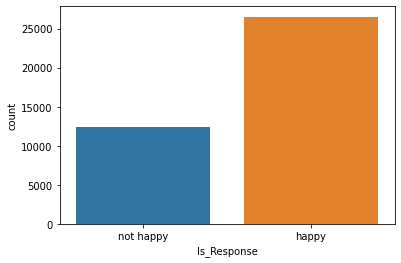

In [ ]:
sns.countplot(hotel_train['Is_Response'])

percentage for default 

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


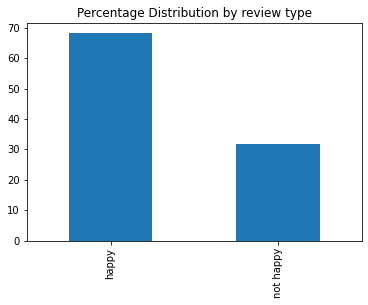

In [ ]:
print("percentage for default \n")
print(round(hotel_train.Is_Response.value_counts(normalize=True)*100, 2))
round(hotel_train.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title("Percentage Distribution by review type")
plt.show()

In [ ]:
#as u can see 68% are happy comments and 32% reveiws are unhappy

In [ ]:
#we need to remove redundant columns from the dataset now 
hotel_train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [ ]:
#as u can infer, we will have to remove User_ID, Browser_Used, Device_Used columns from the dataset. 
#we can do that by dropping these specific columns 
hotel_train.drop(columns=['User_ID', 'Browser_Used', 'Device_Used'], inplace=True)

In [ ]:
hotel_train.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [ ]:
#we are only left with the description and the response 


Cleaning of Text Data

In [ ]:
import re
import string

In [ ]:
#we will first remove brackets, numbers, punctuation and convert all cases to lower-case

In [ ]:
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)


In [ ]:
hotel_train['cleaned_description'] = pd.DataFrame(hotel_train.Description.apply(cleaned1))
hotel_train.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [ ]:
#as u can see in the cleaned data, the hyphens are gone n it is cleaner than the previous text. 

In [ ]:
#we have to do a round 2 of cleaning 
#REPLACE QUOTES WITH BLANK AND NEW LINE WITH BLANK

In [ ]:
def text_clean2(text):
    text=re.sub('[‘’“”…]', '', text)
    text=re.sub('\n', '', text)
    return text

cleaned2=lambda x: text_clean2(x)

In [ ]:
hotel_train['cleaned_new']=pd.DataFrame(hotel_train['cleaned_description'].apply(cleaned2))
hotel_train.head(10)

,Description,Is_Response,cleaned_description,cleaned_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


In [ ]:
#NOW OUR DATA IS CLEANED

Model Training 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=hotel_train['cleaned_new']
y=hotel_train['Is_Response']

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=10)  

In [ ]:
len(x_train)

31145

In [ ]:
len(x_test)

7787

In [ ]:
len(y_train)

31145

In [ ]:
len(y_test)

7787

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(x_train, y_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(x_test)

confusion_matrix(predictions, y_test)

array([[4994,  575],
       [ 298, 1920]])

Metrics for Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score



In [ ]:
print("Accuracy:", accuracy_score(predictions, y_test))
print("Precision:", precision_score(predictions, y_test, average='weighted'))
print("Recall:", recall_score(predictions, y_test, average='weighted'))

Accuracy: 0.8878900731989213
Precision: 0.8940849382077654
Recall: 0.8878900731989213


Prediction Model

In [ ]:
a=["I'm disappointed with this place."]
result=model.predict(a)
result

array(['not happy'], dtype=object)

In [ ]:
#as u can see it predicts the sentiment of the review I put in as 'not happy;